In [1]:
import pandas as pd

# Model Training

In [2]:
import sys

sys.path.append('..')

In [3]:
from src.train import build_model

training_data_df = pd.read_csv('../data/train.csv')
model_performance_dict = build_model(training_data_df, 'first experiment')

print(model_performance_dict)

{'mse': 913542118.7078887, 'msle': 0.02417075122465054, 'rmsle': 0.155}


/Users/meghas/opt/miniconda3/envs/ai_project_methodology/lib/python3.9/site-packages/_distutils_hack/__init__.py:30: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


# Visualisation using Shap

## Build a TreeExplainer and compute Shaplay Values


In [21]:
import shap
from src.inference import get_best_model
from src.preprocess import get_preprocessed_data

model = get_best_model() # get the model
explainer = shap.TreeExplainer(model) # Create the Explainer
data = get_preprocessed_data(pd.read_csv('../data/test.csv'), False)[:500]


using model: /Users/meghas/EPITA/S3/AIMethodology/AI_Project_Methodology/models/mlruns/1/4195990450c742868a5e980bf16f2f97/artifacts/random forest regressor with id: 4195990450c742868a5e980bf16f2f97



## Visualize explanations for a specific point of your data set


In [22]:

choosen_instance = data.loc[[0]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0], choosen_instance)

In [23]:

choosen_instance = data.loc[[10]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0], choosen_instance)

In [26]:

choosen_instance = data.loc[[100]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0], choosen_instance)

# 500 instances data visualization using shap

In [24]:

shap_values = explainer.shap_values(data)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, data)

## Visualize a summary plot for each class on the whole dataset

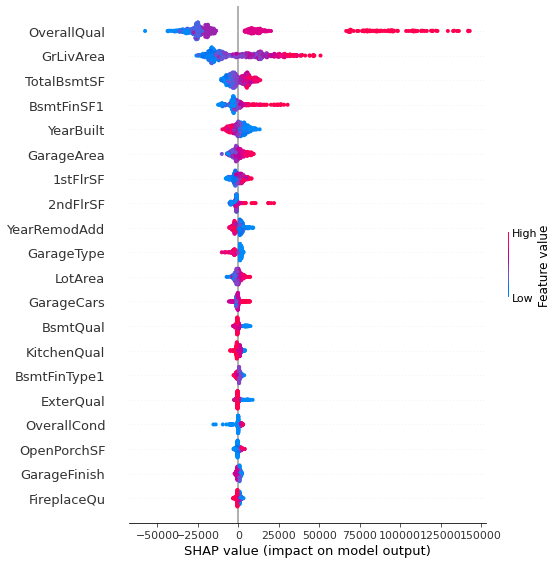

In [25]:
shap.summary_plot(shap_values, data)

# Model Inference

In [5]:
user_data_df = pd.read_csv('../data/test.csv')

In [6]:
from src.inference import make_predictions

predictions = make_predictions(user_data_df)

print(predictions[:100])

using model: /Users/meghas/EPITA/S3/AIMethodology/AI_Project_Methodology/models/mlruns/1/4195990450c742868a5e980bf16f2f97/artifacts/random forest regressor with id: 4195990450c742868a5e980bf16f2f97
[122654.575 152381.25  175691.95  182166.    197960.05  179800.
 164784.5   176031.675 171264.05  118075.    191843.2   101901.25
  99980.1   158988.3   136283.75  366865.85  267076.45  295155.125
 262273.475 408943.825 299863.475 209761.325 182028.675 174549.35
 161792.    195578.375 323344.775 240867.925 201416.975 204352.5
 186523.25   99612.5   175040.    305490.75  310582.5   225358.5
 198272.5   152023.425 151113.425 152586.575 175446.25  168558.05
 297446.35  235444.8   220052.9   174220.2   225832.5   189470.6
 166200.    148713.425 151163.75  163676.25  145235.15  152317.5
 173423.5   153323.3   151052.5   130540.275 220521.    138348.75
 145438.75  157845.    114239.    129151.25  119322.9   125688.75
 100540.05  129439.575 143526.25  161753.5   136657.5   109617.5
 144254.675 1152